In [2]:
import pandas as pd
import matplotlib.pyplot as plt

admissions = pd.read_csv("admissions.csv")

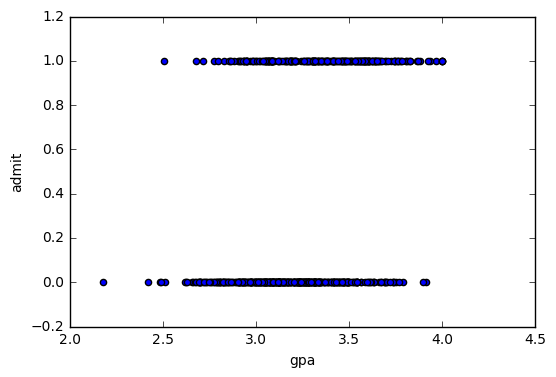

In [3]:
admissions.plot("gpa", "admit", kind="scatter")
plt.show()

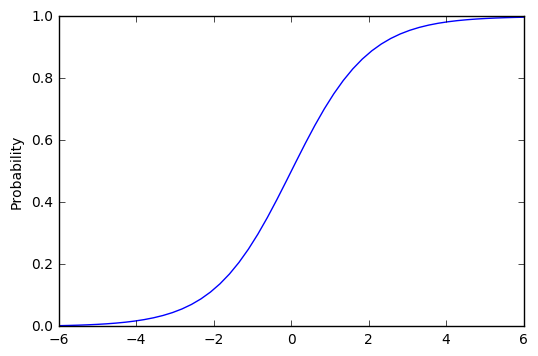

In [4]:
import numpy as np

# Logit Function
def logit(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logit function.
y = logit(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

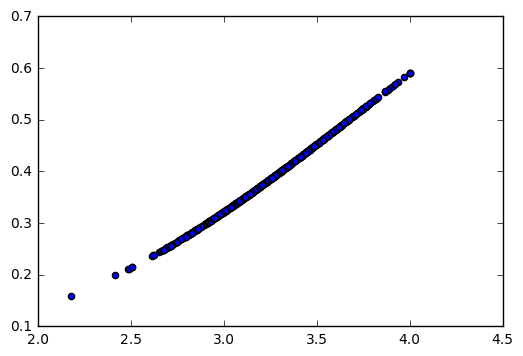

In [5]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
fig = plt.figure()
axe1 = fig.add_subplot(1,1,1)
axe1.scatter(admissions["gpa"], pred_probs[:,1])
plt.show()

In [6]:
labels = logistic_model.predict(admissions[["gpa"]])
print(labels[0:10])

[0 0 0 0 0 0 0 0 0 1]


In [7]:
admissions["predicted_label"] = labels
print(admissions["predicted_label"].value_counts())
admissions.head()

0    598
1     46
Name: predicted_label, dtype: int64


,admit,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0


In [8]:
admissions.rename(index=str, columns={"admit" : "actual_label"}, inplace=True)
matches = (admissions["actual_label"] == admissions["predicted_label"])
correct_predictions = admissions[matches == True]
correct_predictions.head()

,actual_label,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0


In [9]:
accuracy = correct_predictions.shape[0] / admissions.shape[0]
print(accuracy)

0.6459627329192547


In [10]:
true_positives = admissions[(admissions.predicted_label == 1) & (admissions.actual_label == 1)].shape[0]
print(true_positives)

31


In [11]:
true_negatives = admissions[(admissions.predicted_label == 0) & (admissions.actual_label == 0)].shape[0]
print(true_negatives)

385


In [12]:
false_negatives = admissions[(admissions.predicted_label == 0) & (admissions.actual_label == 1)].shape[0]
print(false_negatives)

213


In [13]:
sensitivity = true_positives / (true_positives + false_negatives)
print(sensitivity)

0.12704918032786885


In [14]:
false_positives = admissions[(admissions.predicted_label == 1) & (admissions.actual_label == 0)].shape[0]
specificity = true_negatives / (false_positives + true_negatives)
print(specificity)

0.9625


# Cross Validation

In [15]:
import numpy as np
np.random.seed(8)

shuffled_admissions = admissions.loc[np.random.permutation(admissions.index)]

In [16]:
train = shuffled_admissions[:515]
test = shuffled_admissions[515:]
shuffled_admissions.head()

,actual_label,gpa,gre,predicted_label
260,0,3.414036,577.665610,0
173,0,2.932147,564.798764,0
256,0,2.674040,599.895858,0
167,0,2.923581,622.524665,0
400,1,3.414376,704.934217,0


In [17]:
model = LogisticRegression()
model.fit(train[["gpa"]], train["actual_label"])
test["predicted_label"] = model.predict(test[["gpa"]])
accuracy = test[(test.predicted_label == test.actual_label)].shape[0] / test.shape[0]
print(accuracy)

0.6356589147286822


/home/mark/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [18]:
true_positives = test[(test.predicted_label == 1) & (test.actual_label == 1)].shape[0]
print(true_positives)
true_negatives = test[(test.predicted_label == 0) & (test.actual_label == 0)].shape[0]
print(true_negatives)
false_negatives = test[(test.predicted_label == 0) & (test.actual_label == 1)].shape[0]
print(false_negatives)
sensitivity = true_positives / (true_positives + false_negatives)
print(sensitivity)

4
78
44
0.08333333333333333


In [19]:
false_positives = test[(test.predicted_label == 1) & (test.actual_label == 0)].shape[0]
specificity = true_negatives / (false_positives + true_negatives)
print(specificity)

0.9629629629629629


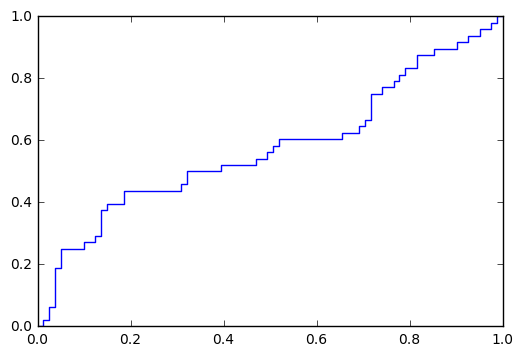

In [20]:
from sklearn.metrics import roc_curve

predicted_prob = model.predict_proba(test[["gpa"]])
#print(test.actual_label.tolist())
#print(predicted_prob.tolist())
fpr, tpr, thresholds = roc_curve(test.actual_label.tolist(), predicted_prob[:,1].tolist())
fig = plt.figure()
axe1 = fig.add_subplot(1,1,1)
axe1.plot(fpr, tpr)
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(test.actual_label.tolist(), predicted_prob[:,1].tolist())
print(auc_score)

0.577932098765


# K-Fold Cross Validation

In [22]:
admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)

shuffled_index = np.random.permutation(admissions.index)
shuffled_admissions = admissions.loc[shuffled_index]
admissions = shuffled_admissions.reset_index()
admissions.head()

,index,gpa,gre,actual_label
0,351,3.530598,586.149180,0
1,299,2.692225,795.114106,0
2,123,3.119102,548.824829,0
3,93,3.310185,505.381002,0
4,85,3.336941,489.931757,0


In [23]:
admissions.tail()

,index,gpa,gre,actual_label
639,533,3.091111,593.466163,1
640,329,3.167267,572.843785,0
641,608,3.774355,717.463598,1
642,598,3.203221,726.309382,1
643,310,3.718315,602.845694,0


In [24]:
admissions["fold"] = pd.Series()
admissions.loc[:129 , "fold"]= 1
admissions.loc[129:258, "fold"] = 2
admissions.loc[258:387, "fold"] = 3
admissions.loc[387:515, "fold"] = 4
admissions.loc[515:644, "fold"] = 5

admissions["fold"] = admissions["fold"].astype(int)
print(admissions.head())
print(admissions.tail())

   index       gpa         gre  actual_label  fold
0    351  3.530598  586.149180             0     1
1    299  2.692225  795.114106             0     1
2    123  3.119102  548.824829             0     1
3     93  3.310185  505.381002             0     1
4     85  3.336941  489.931757             0     1
     index       gpa         gre  actual_label  fold
639    533  3.091111  593.466163             1     5
640    329  3.167267  572.843785             0     5
641    608  3.774355  717.463598             1     5
642    598  3.203221  726.309382             1     5
643    310  3.718315  602.845694             0     5


In [25]:
model = LogisticRegression()
train = admissions[(admissions.fold != 1)]
test = admissions[(admissions.fold == 1)]
#print(train.head())
model.fit(train[["gpa"]], train["actual_label"])
labels = model.predict(test[["gpa"]])
test["predicted_label"] = labels

matches = (test["actual_label"] == test["predicted_label"])
correct_predictions = test[matches == True]
#print(matches)
accuracy = correct_predictions.shape[0] / test.shape[0]
print(accuracy)

0.7131782945736435


/home/mark/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
def train_and_test(data, fold_ids):
    acc_list = []
    for i in fold_ids:
        train = admissions[(admissions.fold != i)]
        test = admissions[(admissions.fold == i)]
        model = LogisticRegression()
        model.fit(train[["gpa"]], train["actual_label"])
        labels = model.predict(test[["gpa"]])
        test["predicted_label"] = labels
        matches = (test["actual_label"] == test["predicted_label"])
        correct_predictions = test[matches == True]
        accuracy = correct_predictions.shape[0] / test.shape[0]
        acc_list.append(accuracy)   
    return acc_list
    
accuracies = train_and_test(admissions, [1,2,3,4,5])
print(accuracies)    

/home/mark/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[0.7131782945736435, 0.6046511627906976, 0.5736434108527132, 0.6640625, 0.6744186046511628]


In [27]:
average_accuracy = sum(accuracies)/len(accuracies)
print(average_accuracy)

0.6459907945736434


In [31]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)

kf = KFold(len(admissions), 5, shuffle=True, random_state=8)
lr = LogisticRegression()
print(len(admissions.gpa.tolist()))
print(len(admissions.actual_label.tolist()))
accuracies = cross_val_score(lr, admissions[["gpa"]], admissions.actual_label, "accuracy", kf)
print(accuracies)
average_accuracy = sum(accuracies) / len(accuracies)
print(average_accuracy)

644
644
[ 0.6124031   0.65891473  0.64341085  0.6744186   0.6328125 ]
0.644391957364
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
